In [11]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [12]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/wm-nowm/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/wm-nowm/test'    # Update with your actual path

In [13]:
import os
print(len(os.listdir('/content/drive/MyDrive/wm-nowm/train/no-watermark')))
print(len(os.listdir('/content/drive/MyDrive/wm-nowm/train/watermark')))
print(len(os.listdir('/content/drive/MyDrive/wm-nowm/test/no-watermark')))
print(len(os.listdir('/content/drive/MyDrive/wm-nowm/test/watermark')))

880
980
220
200


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 793 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
47/47 [==============================] - 567s 12s/step - loss: 0.7045 - accuracy: 0.5309 - val_loss: 0.6925 - val_accuracy: 0.5215
Epoch 2/30
47/47 [==============================] - 263s 6s/step - loss: 0.6914 - accuracy: 0.5235 - val_loss: 0.7013 - val_accuracy: 0.5269
Epoch 3/30
47/47 [==============================] - 267s 6s/step - loss: 0.6834 - accuracy: 0.5591 - val_loss: 0.6836 - val_accuracy: 0.5269
Epoch 4/30
47/47 [==============================] - 262s 6s/step - loss: 0.6318 - accuracy: 0.6237 - val_loss: 0.6289 - val_accuracy: 0.6398
Epoch 5/30
47/47 [==============================] - 265s 6s/step - loss: 0.5186 - accuracy: 0.7345 - val_loss: 0.6205 - val_accuracy: 0.6532
Epoch 6/30
47/47 [==============================] - 259s 6s/step - loss: 0.4049 - accuracy: 0.8118 - val_loss: 0.6332 - val_accuracy: 0.6747
Epoch 7/30
47/47 [==============================] - 255s 5s/step - loss: 0.3005 - accuracy: 0.8763 - val_loss: 0.8388 - val_accuracy: 0.6478
Epoch 8/30
4

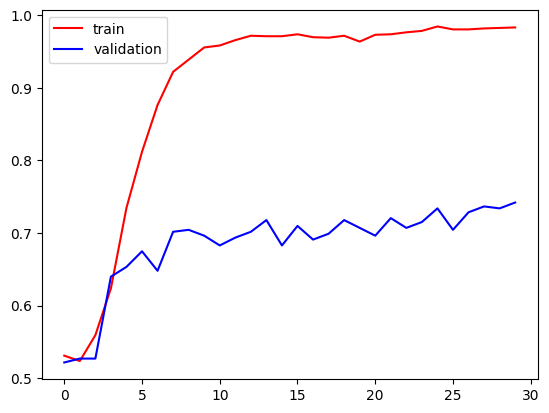

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

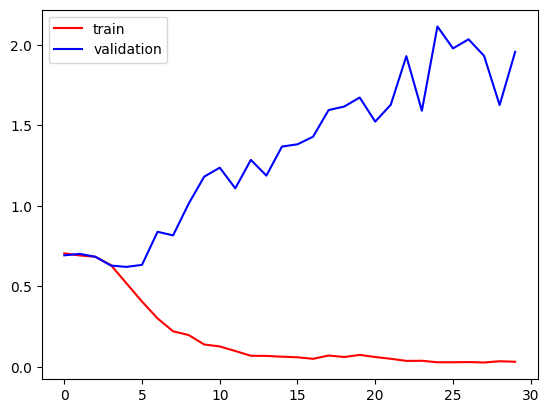

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 420 images belonging to 2 classes.


In [17]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

14/14 [==============================] - 117s 9s/step
[[9.99994338e-01]
 [4.43435311e-02]
 [4.16036897e-07]
 [1.00000000e+00]
 [8.96948874e-01]
 [9.99712110e-01]
 [9.99219060e-01]
 [1.75917808e-10]
 [1.90774102e-07]
 [6.68330431e-01]
 [2.53643072e-03]
 [7.99936116e-01]
 [1.00000000e+00]
 [9.99992669e-01]
 [2.36315243e-12]
 [7.91996424e-09]
 [7.12464809e-01]
 [4.61593881e-05]
 [2.61098891e-01]
 [9.99968886e-01]
 [1.15134311e-03]
 [2.55975203e-04]
 [9.98395979e-01]
 [3.33244205e-01]
 [1.89252317e-01]
 [6.49132926e-05]
 [8.75658244e-02]
 [9.99508083e-01]
 [2.55253226e-01]
 [1.00000000e+00]
 [9.99490559e-01]
 [1.42529896e-02]
 [1.00000000e+00]
 [3.88372578e-02]
 [2.56206959e-01]
 [9.99995291e-01]
 [9.99985814e-01]
 [6.00853295e-04]
 [1.63028300e-01]
 [9.93204951e-01]
 [1.91469968e-03]
 [9.99999881e-01]
 [9.99910653e-01]
 [9.36875045e-01]
 [2.48575746e-03]
 [2.68485025e-03]
 [9.74268734e-01]
 [9.99996245e-01]
 [2.49378732e-04]
 [5.36200241e-04]
 [7.22078886e-09]
 [1.00000000e+00]
 [1.580789

In [18]:
len(predictions)

420

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[110 110]
 [106  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       220
           1       0.46      0.47      0.47       200

    accuracy                           0.49       420
   macro avg       0.49      0.48      0.48       420
weighted avg       0.49      0.49      0.49       420

